### Overview of Project Tasks

Final Project: For the project scenario, here is an overview of your tasks. The following reading sections will provide you with detailed instructions for each task.

Project Tasks:

#### Task 1: Familiarize yourself with the dataset 

#### Task 2: Generate basic statistics and visualizations for upper management. 

#### Task 3: Use the appropriate tests to answer the questions provided.

#### Task 4: Share your Jupyter Notebook.

### Task 1:
The following describes the dataset variables:

*  CRIM - per capita crime rate by town

*  ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

*  INDUS - proportion of non-retail business acres per town.

*  CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

*  NOX - nitric oxides concentration (parts per 10 million)

*  RM - average number of rooms per dwelling

*  AGE - proportion of owner-occupied units built prior to 1940

*  DIS - weighted distances to five Boston employment centres

*  RAD - index of accessibility to radial highways

*  TAX - full-value property-tax rate per $10,000

*  PTRATIO - pupil-teacher ratio by town

*  LSTAT - % lower status of the population

*  MEDV - Median value of owner-occupied homes in $1000's

### Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

#### Generate the following and explain your findings:

*  For the "Median value of owner-occupied homes" provide a boxplot

*  Provide a  bar plot for the Charles river variable

*  Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

*  Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

*  Create a histogram for the pupil to teacher ratio variable

### Task 3: Use the appropriate tests to answer the questions provided.

*  For each of the following questions;

*  Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

*  Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

*  Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

*  What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

    1.State your hypothesis.

    2.Use α = 0.05

    3.Perform the test Statistics.

    4.State the conclusion from the test.

#### Import packages


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read csv from the URL

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### EDA

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.shape

(506, 14)

In [5]:
missing_values = boston_df.isnull().sum()

In [6]:
missing_values

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [7]:
unique_values = boston_df.nunique()

In [8]:
unique_values

Unnamed: 0    506
CRIM          504
ZN             26
INDUS          76
CHAS            2
NOX            81
RM            446
AGE           356
DIS           412
RAD             9
TAX            66
PTRATIO        46
LSTAT         455
MEDV          229
dtype: int64

In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [10]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


#### Dataset is not missing values and all of them are numerical (float). There is no need to fill any missing values or extensively preprocess the data

### Correlation Matrix

In [11]:
correlation_matrix = boston_df.corr()

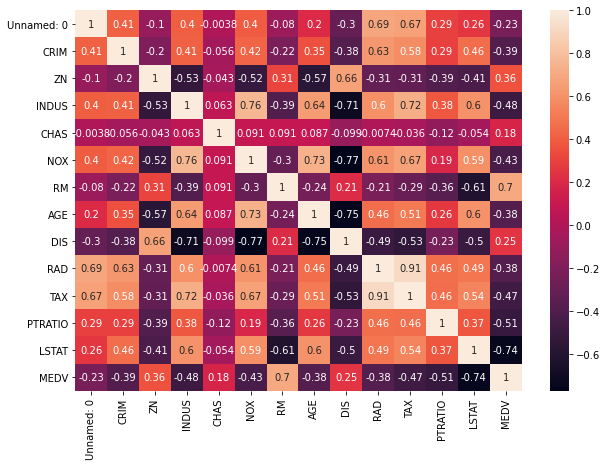

In [12]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

There are multiple variables with strong positive correlation, for example:
    RAD and TAX
    AGE and NOX
    INDUS and NOX
    MEDV and RM
There are also multiple variables with strong negative correlation, for example:
    INDUS and DIS
    NOX and DIS
    AGE and DIS
    MEDV and LSTAT

All those correlations indicate that there is a lot of features with linear relationship and in case of using ML model we can reduce number of used features

#### Outliers detection

In [13]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [14]:
column_list = boston_df.columns.tolist()

In [15]:
column_list = column_list[1:]

In [16]:
column_list

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

#### Data Distribution

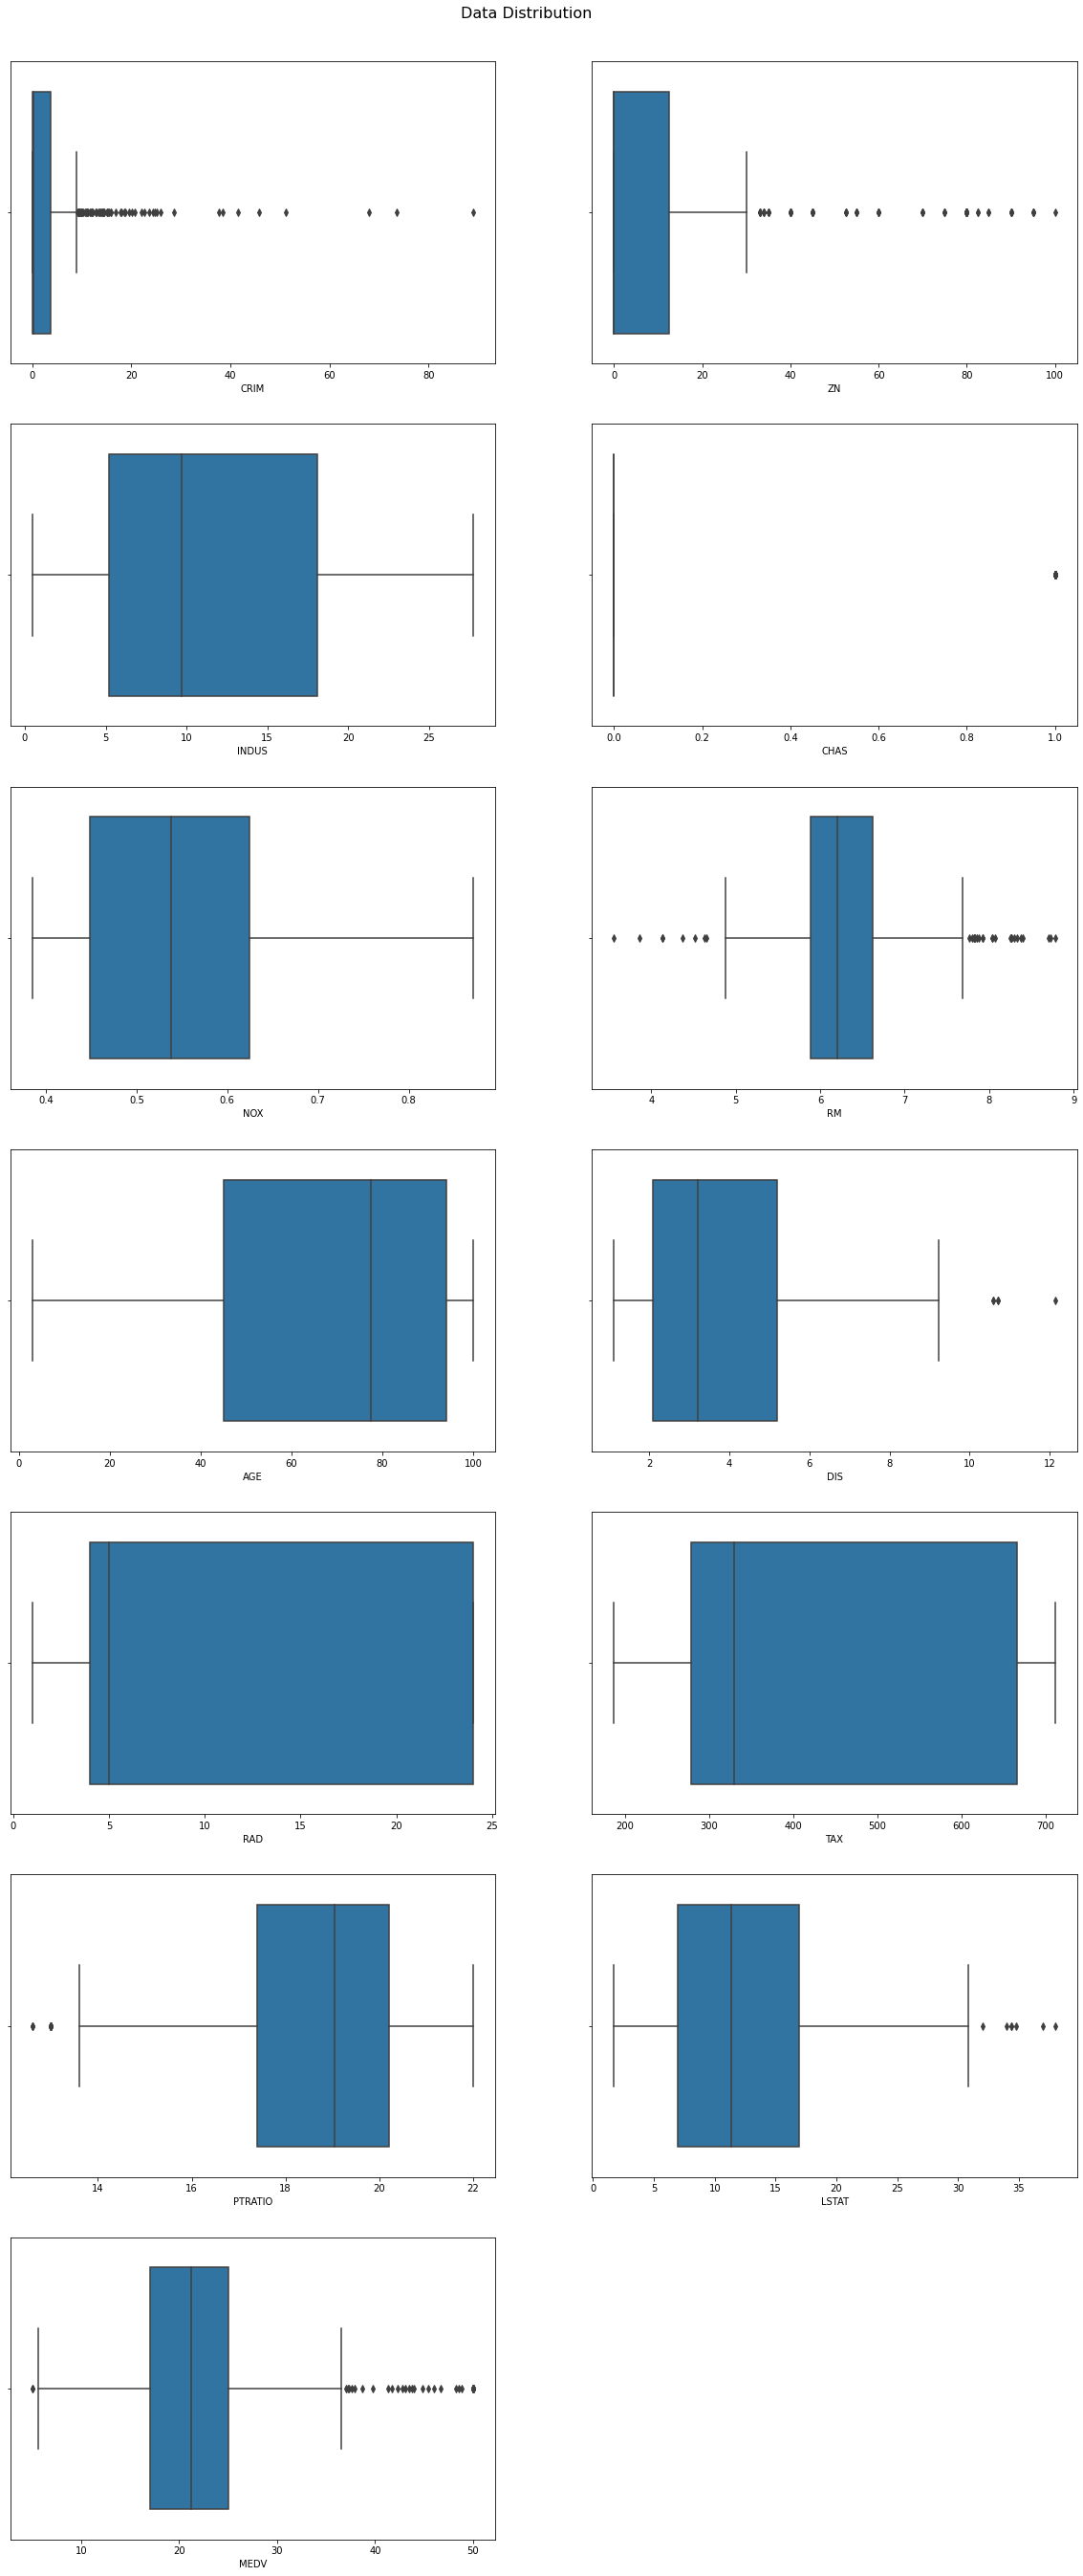

In [17]:
plt.figure(figsize=(20,80))
plt_num = 1
plt.tight_layout()
plt.suptitle('Data Distribution', size=16);      
for col in column_list:
    ax = plt.subplot(13,2, plt_num)
    sns.boxplot(x=boston_df[col])
    plt.xlabel(col)
    plt_num += 1
plt.subplots_adjust(top=0.97)    
plt.show()

Using dataframe describe() method and boxplots for visualisation it is easy to spot that multiple features have outliers, for example MEDV or ZN

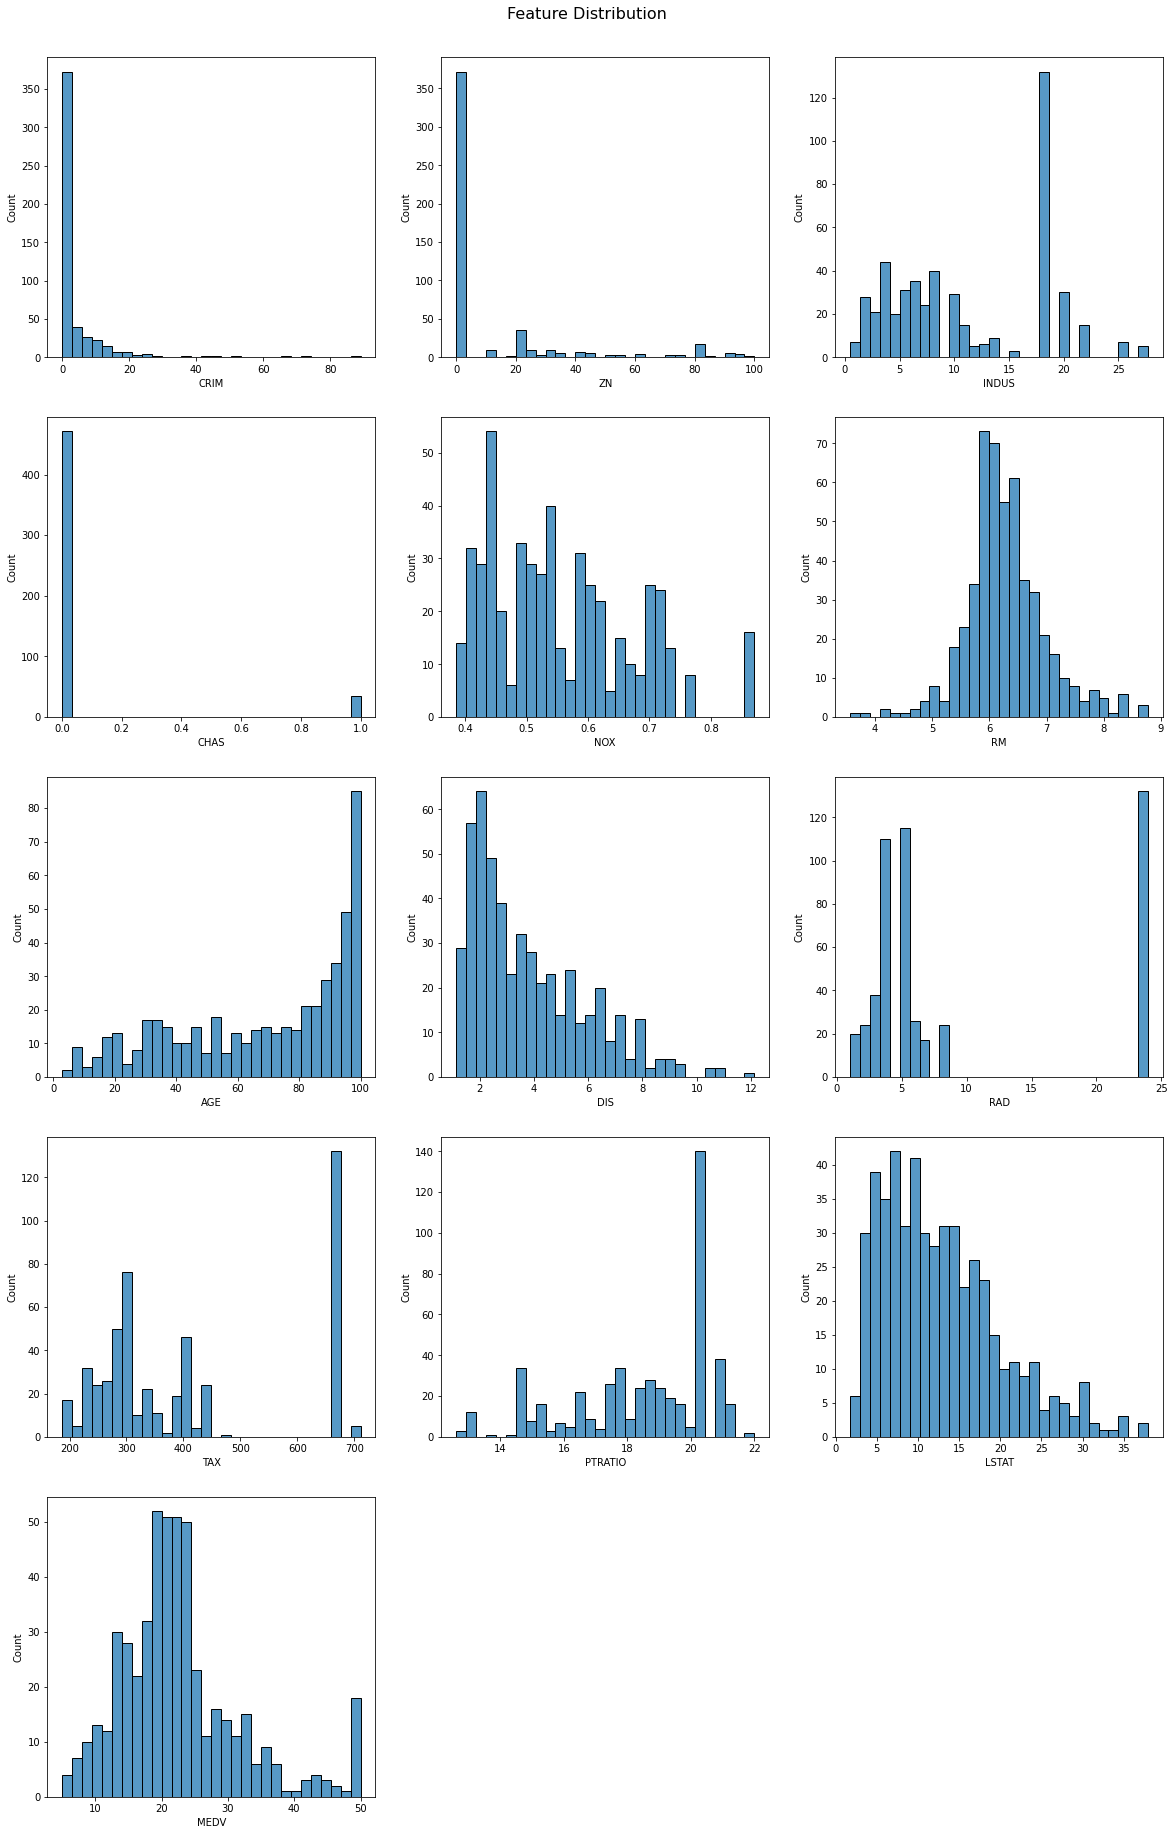

In [18]:
plt.figure(figsize=(20,70))
plt_num = 1
plt.tight_layout()
plt.suptitle('Feature Distribution', size=16);    
for col in column_list:
    ax = plt.subplot(12,3, plt_num)
    sns.histplot(data=boston_df[col], bins=30)
    plt.xlabel(col)
    plt_num += 1
plt.subplots_adjust(top=0.97)  
plt.show()

### Task 2: Generate Descriptive Statistics and Visualizations

##### Provide a boxplot for "Median value of owner-occupied homes"

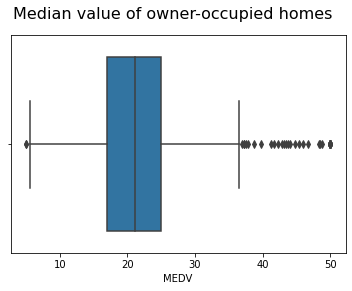

In [19]:
plt.figure()
plt.tight_layout()
plt.suptitle('Median value of owner-occupied homes', size=16);      
sns.boxplot(x=boston_df['MEDV'])
plt.xlabel('MEDV')  
plt.show()

Boxplot shows:
*  Q0 - Minimum (left whisker)
*  Q1 - First quartile (left part of blue box)
*  Q2 - Second quartile, Median (Black line inside blue box)
*  Q3 - Third Quartile (right part of blue box)
*  Q4 - Maximum
*  Outliers (left and right side of whiskers)

##### Provide a  bar plot for the Charles river variable

In [20]:
chas_df = boston_df[['CHAS']].copy()
housing_map = {1:'yes', 0: 'no'}
chas_df['housing'] = chas_df['CHAS'].map(housing_map)

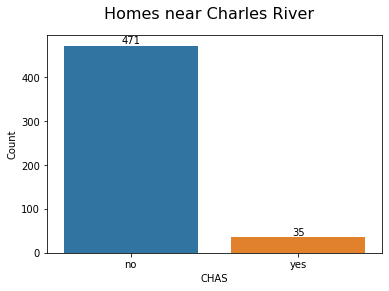

In [21]:
plt.figure()
plt.tight_layout()
plt.suptitle('Homes near Charles River', size=16);      
ax=sns.barplot(x=chas_df['housing'].value_counts().index, y=chas_df['housing'].value_counts())
ax.bar_label(ax.containers[0])
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.show()

Most of homes do not bound Charles River

##### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [22]:
age_df = boston_df.copy()
age_df.loc[(age_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
age_df.loc[(age_df['AGE'] > 35) & (age_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
age_df.loc[(age_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

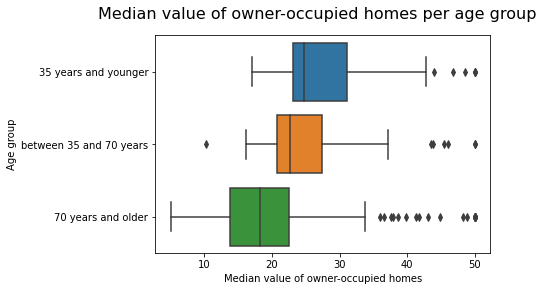

In [23]:
plt.figure()
plt.tight_layout()
plt.suptitle('Median value of owner-occupied homes per age group', size=16);      
sns.boxplot(y=age_df['Age_Group'], x=age_df['MEDV'], 
            order=["35 years and younger", "between 35 and 70 years", "70 years and older"])
plt.xlabel('Median value of owner-occupied homes')
plt.ylabel('Age group')
plt.show()

Based on boxplot above it can be seen, that median value of owner-occupied home is higher for newer houses

##### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

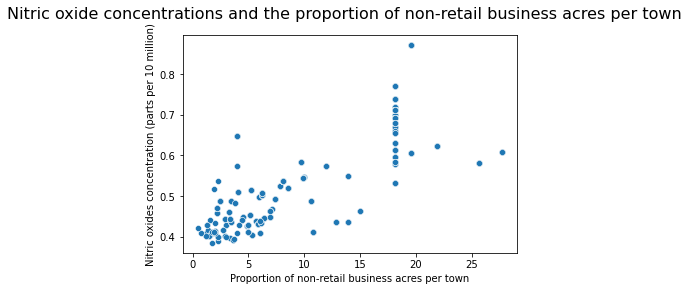

In [24]:
plt.figure()
plt.tight_layout()
plt.suptitle('Nitric oxide concentrations and the proportion of non-retail business acres per town', size=16);      
sns.scatterplot(y=boston_df['NOX'], x=boston_df['INDUS'])
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Nitric oxides concentration (parts per 10 million)')
plt.show()

Scatter plot above indicates relation between NOX and INDUS.
Nitric oxides concentration is rising for higher proportion of non-retail business acres per town.
For proportion around 19 non-retail business acres per town there is straight rise in NOX concentration. 
Perhaps NOX is rising for overall bigger towns, that tends to have higher proportion of non-retail business acres.

##### Create a histogram for the pupil to teacher ratio variable

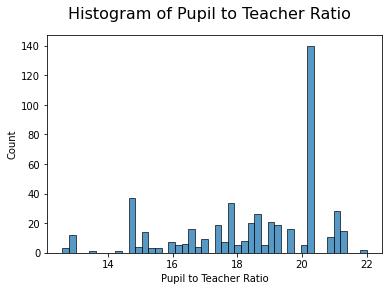

In [25]:
plt.figure()
plt.tight_layout()
plt.suptitle('Histogram of Pupil to Teacher Ratio', size=16);      
sns.histplot(data=boston_df['PTRATIO'], bins=46)
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Count')
plt.show()

Pupil-teacher ratio is calculated by dividing the number of students at the specified level of education by the number of teachers at the same level of education.
One of towns have multiple times higher PTRATIO, perhaps town is small and there is only single school with few teachers.

### Task 3: Use the appropriate tests to answer the questions provided.
Be sure to:

    1.State your hypothesis.

    2.Use α = 0.05

    3.Perform the test Statistics.

    4.State the conclusion from the test.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

##### Hypothesis:

-   $H_0: $There is no significant difference in median value of houses bounded and not bounded by the Charles river
-   $H_1: $There is significant difference in median value of houses bounded and not bounded by the Charles river

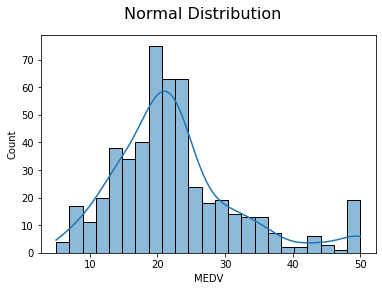

In [26]:
plt.figure()
plt.tight_layout()
plt.suptitle('Normal Distribution', size=16);      
sns.histplot(data=boston_df['MEDV'], kde=True)
plt.xlabel('MEDV')
plt.ylabel('Count')
plt.show()

Assumed normal distribution
Levene test to determine if all input samples are from populations with equal variances.
With assumption of normal distribution center parameter for levene test will be 'mean'

In [27]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

p-value is less than 0.05 therefore variances are not equal

In [28]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, null hypothesis must be rejected, as there is enough proof that there is a significant difference in median value of houses bounded and not bounded by the Charles river

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

##### Hypothesis:

-   $H_0: µ_1 = µ_2 = µ_3$ (the three means are equal)
-   $H_1:$ At least one of the means differ

In [29]:
scipy.stats.levene(age_df[age_df['Age_Group'] == '35 years and younger']['MEDV'],
                   age_df[age_df['Age_Group'] == 'between 35 and 70 years']['MEDV'], 
                   age_df[age_df['Age_Group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

p-value is more than 0.05 therefore variances are equal

In [30]:
scipy.stats.f_oneway(age_df[age_df['Age_Group'] == '35 years and younger']['MEDV'],
                   age_df[age_df['Age_Group'] == 'between 35 and 70 years']['MEDV'], 
                   age_df[age_df['Age_Group'] == '70 years and older']['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclusion:** Since the p-value is less than alpha value 0.05, null hypothesis must be rejected, as there is enough proof that at least one of the means differ

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

##### Hypothesis:
-   $H_0:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
-   $H_1:$ There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [31]:
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

In [32]:
pearson,p_value

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** Since the p-value is less than alpha value 0.05, null hypothesis must be rejected, as there is enough proof that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

##### Hypothesis:
-   $H_0:$ There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
-   $H_1:$ There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [33]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        00:11:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value is less than 0.000

**Conclusion:** Since the p-value is less than alpha value 0.05, null hypothesis must be rejected, as there is enough proof that, there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.